In [2]:
import networkx as nx 
from networkx import Graph, DiGraph
import pandas as pd
import time
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
asia_df = pd.read_csv('../data/lastfm_asia_edges.csv')
asia_df.head()

,node_1,node_2
0,0,747
1,1,4257
2,1,2194
3,1,580
4,1,6478


# Question 1

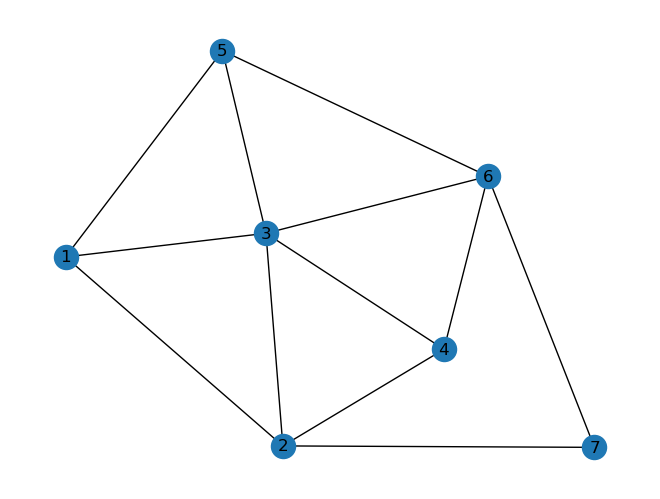

In [23]:
graph = Graph()
graph.add_edges_from([
    (1,2),
    (1,3),
    (1,5),
    (2,3),
    (2,4),
    (2,7),
    (3,5),
    (3,4),
    (3,6),
    (4,6),
    (5,6),
    (6,7),
    ])
pos = nx.spring_layout(graph)
nx.draw(graph, pos=pos)
nx.draw_networkx_labels(graph, pos=pos)
plt.plot()
plt.show()


$C = \frac{3 \times \text{number of triangles}}{\text{number of connected triplets}}$
## Triangles
$(v_1,v_2,v_3)$
$(v_1,v_3,v_5)$
$(v_3,v_5,v_6)$
$(v_3,v_2,v_4)$
$(v_3,v_4,v_6)$

## Triplets
$(v_1,v_2,v_3)$
$(v_2,v_1,v_3)$
$(v_1,v_3,v_2)$

$(v_1,v_3,v_5)$
$(v_1,v_5,v_3)$
$(v_3,v_1,v_5)$

$(v_3,v_5,v_6)$
$(v_3,v_6,v_5)$
$(v_5,v_6,v_3)$

$(v_3,v_2,v_4)$
$(v_3,v_4,v_2)$
$(v_4,v_3,v_2)$

$(v_3,v_4,v_6)$
$(v_3,v_6,v_4)$
$(v_4,v_3,v_6)$

$(v_4,v_2,v_7)$
$(v_4,v_6,v_7)$

$\text{number of triangles} =  5$\
$\text{number of connected triplets} =  17$

$C = \frac{3 \times 5}{17}$
$C = \frac{15}{17} \approx .882$



In [24]:
print(f"Global clustering coefficient: {nx.transitivity(graph)}")

Global clustering coefficient: 0.46875


# Question 2


$c_u = \frac{2 \times T(u)}{deg(u)(deg(u) - 1)}$
## Local Clustering Coefficient
$c_u(v_1) = \frac{2 \times 2}{3(3 - 1)}$\
$c_u(v_1) = \frac{4}{6} \approx .66 $

$c_u(v_2) = \frac{2 \times 2}{4(4 - 1)}$\
$c_u(v_2) = \frac{4}{12} \approx .33 $

$c_u(v_3) = \frac{2 \times 5}{5(5 - 1)}$\
$c_u(v_3) = \frac{10}{20} = .5 $

$c_u(v_4) = \frac{2 \times 2}{3(3 - 1)}$\
$c_u(v_4) = \frac{4}{6} \approx .66 $\

$c_u(v_5) = \frac{2 \times 2}{3(3 - 1)}$\
$c_u(v_5) = \frac{4}{6} \approx .66 $

$c_u(v_6) = \frac{2 \times 2}{4(4 - 1)}$\
$c_u(v_6) = \frac{4}{12} \approx .33 $

$c_u(v_7) = \frac{2 \times 0}{2(2 - 1)}$\
$c_u(v_7) = \frac{0}{2} = 0 $



## Triplets
$(v_1,v_2,v_3)$
$(v_2,v_1,v_3)$
$(v_1,v_3,v_2)$

$(v_1,v_3,v_5)$
$(v_1,v_5,v_3)$
$(v_3,v_1,v_5)$

$(v_3,v_5,v_6)$
$(v_3,v_6,v_5)$
$(v_5,v_6,v_3)$

$(v_3,v_2,v_4)$
$(v_3,v_4,v_2)$
$(v_4,v_3,v_2)$

$(v_3,v_4,v_6)$
$(v_3,v_6,v_4)$
$(v_4,v_3,v_6)$

$(v_4,v_2,v_7)$
$(v_4,v_6,v_7)$

$\text{number of triangles} =  5$\
$\text{number of connected triplets} =  17$

$C = \frac{3 \times 5}{17}$
$C = \frac{15}{17} \approx .882$

